In [6]:
# 0. PERSIAPAN LINGKUNGAN
!pip install -q pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")
sns.set_theme(font_scale=1.1)
%config InlineBackend.figure_format = 'retina'

# 1. MEMUAT DATASET
from google.colab import files
df = pd.read_csv("/bank-full.csv", sep=';')

print(f"Dimensi dataset : {df.shape[0]:,} baris × {df.shape[1]} kolom")
df.head()


Dimensi dataset : 45,211 baris × 17 kolom


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# 2. STATISTIK DESKRIPTIF & CEK MISSING VALUE
display(df.info())
display(df.describe())
print("\nMissing value per kolom:")
display(df.isna().sum())

# Cek duplikasi
duplicate_count = df.duplicated().sum()
print(f"\n== TOTAL DATA DUPLIKAT: {duplicate_count} ==")

if duplicate_count > 0:
    print("\nContoh data duplikat:")
    print(df[df.duplicated()].head())
else:
    print("Tidak ditemukan data duplikat.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



Missing value per kolom:


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0



== TOTAL DATA DUPLIKAT: 0 ==
Tidak ditemukan data duplikat.


In [12]:
# Identifikasi fitur kategorik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('y')  # kecuali target

# Tampilkan jumlah kategori per kolom kategorik
print("Jumlah kategori unik per fitur kategorik:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} kategori → {df[col].unique()[:5]}")

# Lakukan One-Hot Encoding (contoh manual untuk job saja)
# Import OneHotEncoder sebelum menggunakannya
from sklearn.preprocessing import OneHotEncoder

# Menggunakan sparse_output=False untuk mendapatkan output dense array
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_job = encoder.fit_transform(df[['job']])
encoded_df = pd.DataFrame(encoded_job, columns=encoder.get_feature_names_out(['job']))

# Tampilkan hasil encoding (contoh sebagian kolom saja)
print("\n hasil One-Hot Encoding (fitur 'job'):")
print(encoded_df.head())

Jumlah kategori unik per fitur kategorik:
job: 12 kategori → ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown']
marital: 3 kategori → ['married' 'single' 'divorced']
education: 4 kategori → ['tertiary' 'secondary' 'unknown' 'primary']
default: 2 kategori → ['no' 'yes']
housing: 2 kategori → ['yes' 'no']
loan: 2 kategori → ['no' 'yes']
contact: 3 kategori → ['unknown' 'cellular' 'telephone']
month: 12 kategori → ['may' 'jun' 'jul' 'aug' 'oct']
poutcome: 4 kategori → ['unknown' 'failure' 'other' 'success']

 hasil One-Hot Encoding (fitur 'job'):
   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            0.0   
1         0.0              0.0               0.0            0.0   
2         0.0              0.0               1.0            0.0   
3         0.0              1.0               0.0            0.0   
4         0.0              0.0               0.0            0.0   

   job_management  job_retired 

In [14]:
# Standardisasi Fitur Numerik
from sklearn.preprocessing import StandardScaler
# Pilih fitur numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# numerical_cols.remove('y_encoded')  # Hilangkan target jika sudah ada label encoded - This line caused the error

# Standardisasi data numerik
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan hasil 5 baris pertama setelah standardisasi
print("Hasil standardisasi fitur numerik:")
print(df_scaled[numerical_cols].head())

Hasil standardisasi fitur numerik:
        age   balance       day  duration  campaign     pdays  previous
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453  -0.25194
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453  -0.25194
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453  -0.25194
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453  -0.25194
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453  -0.25194


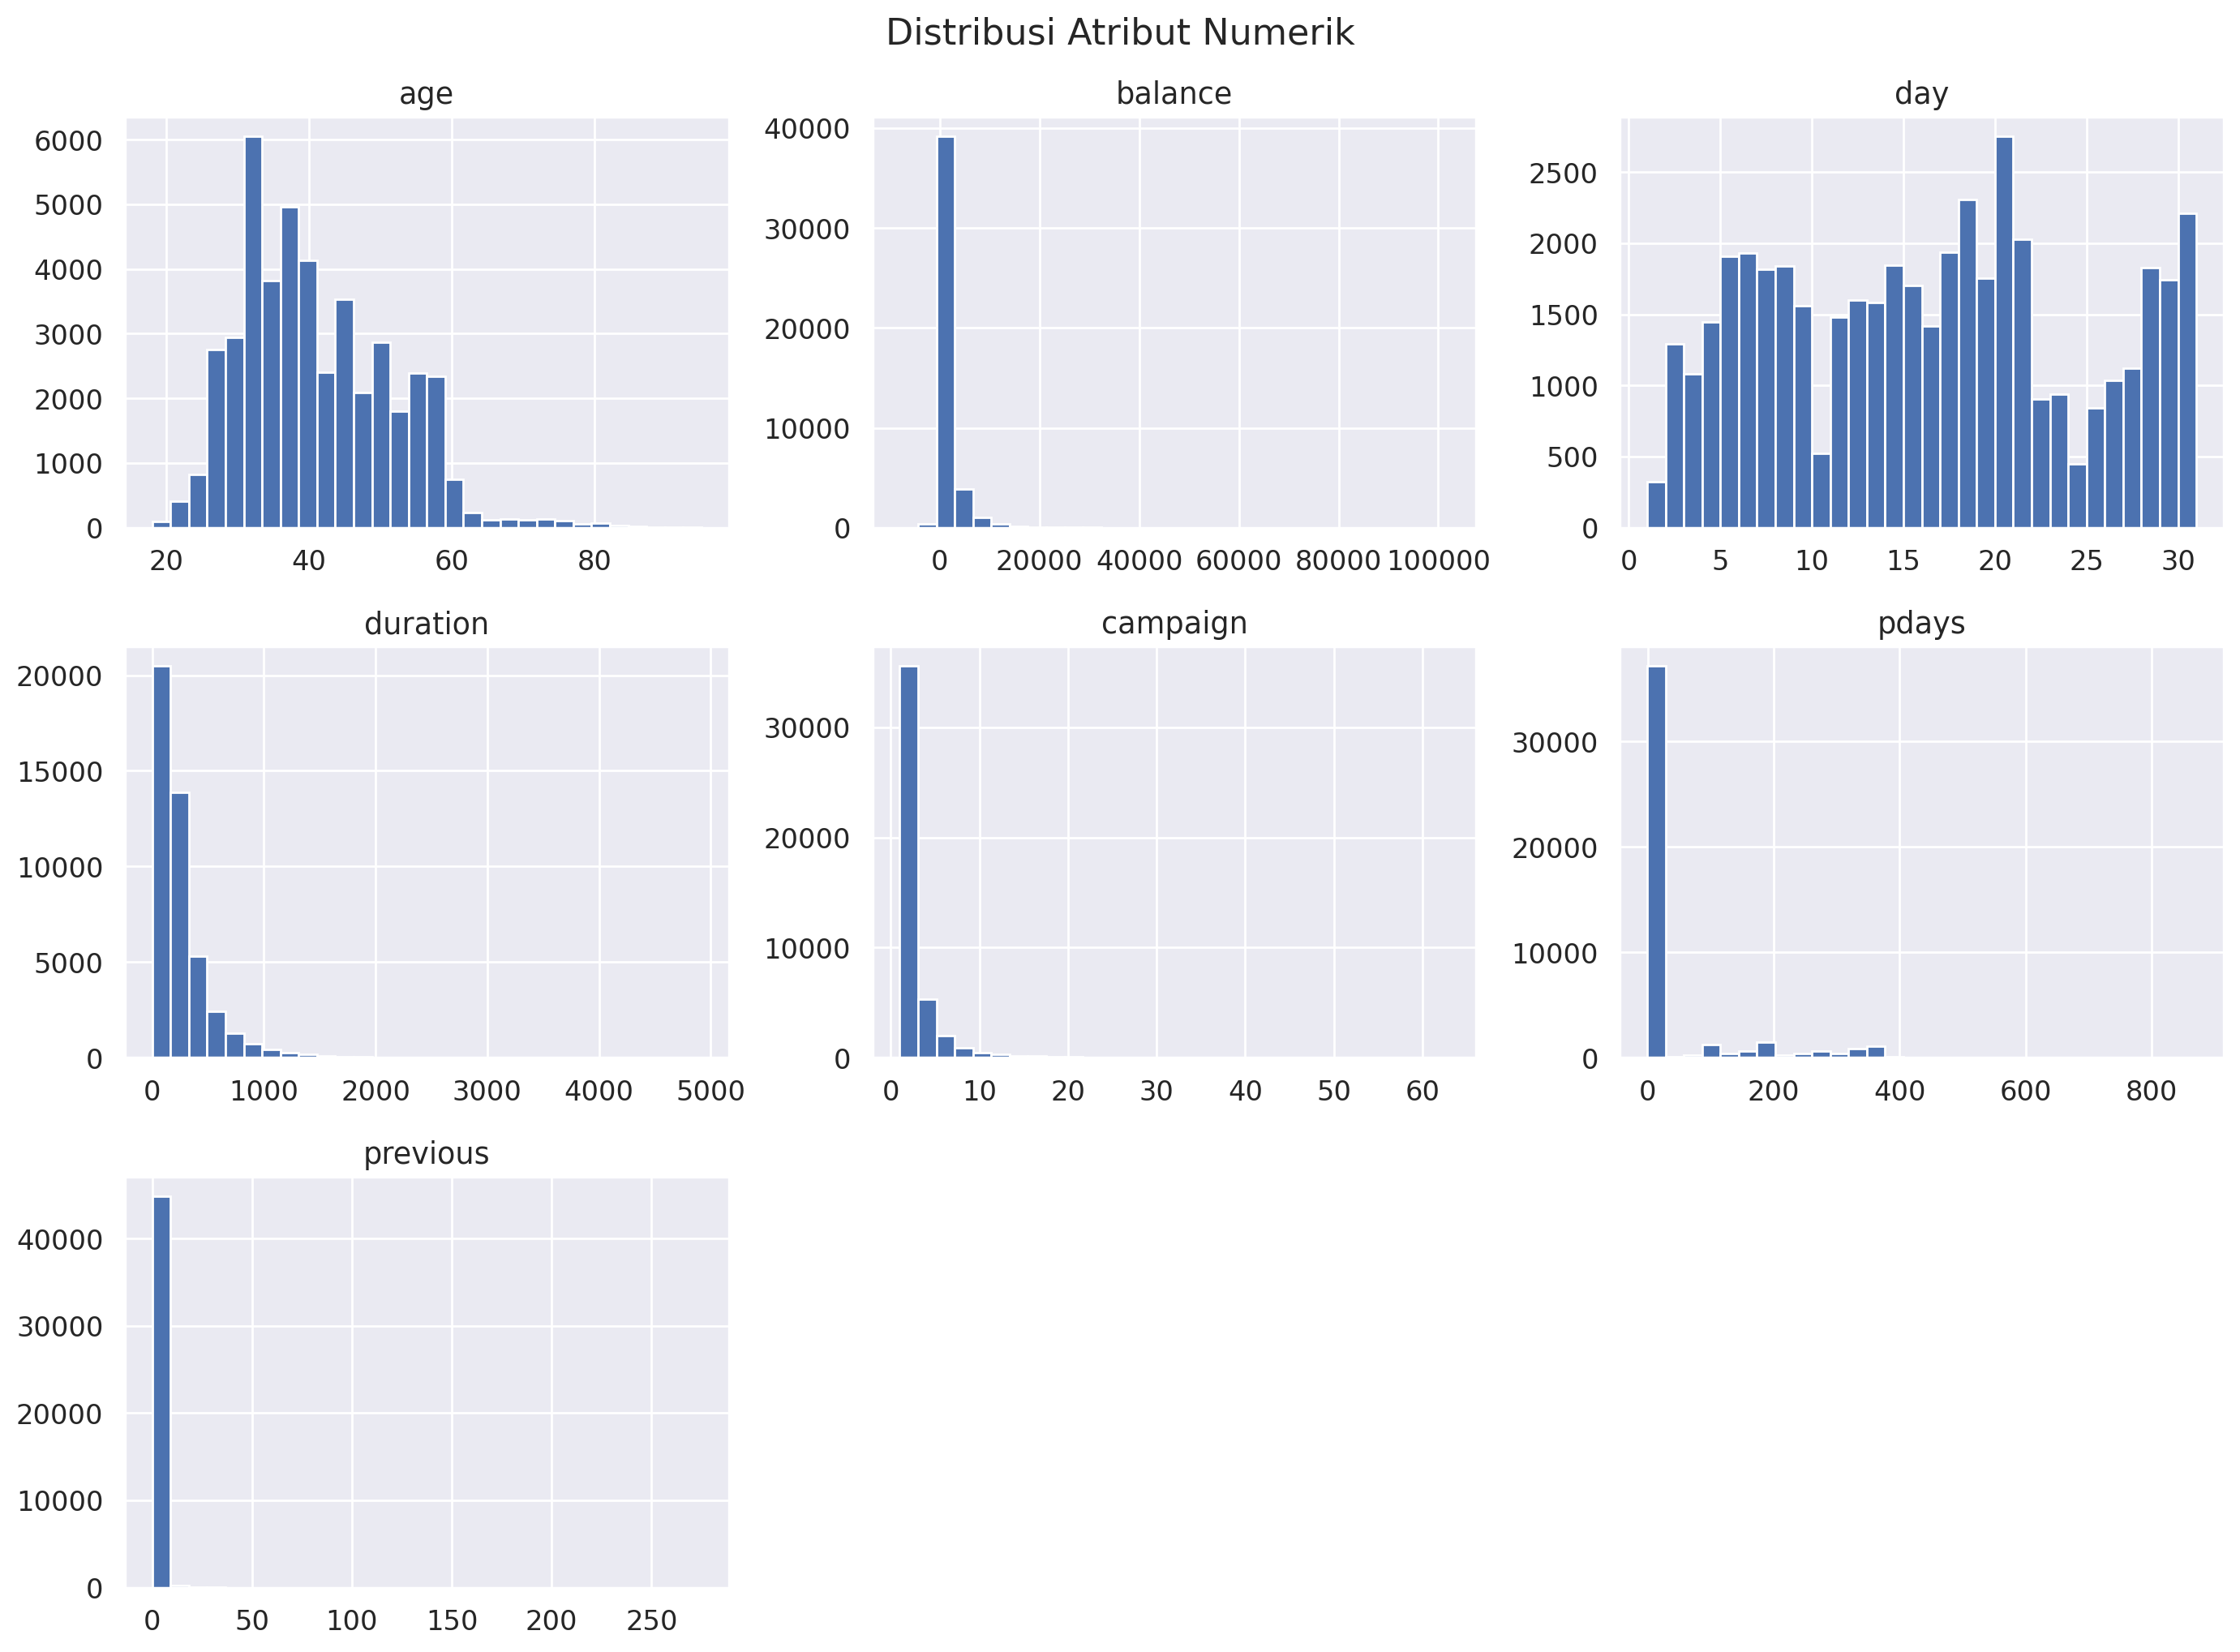

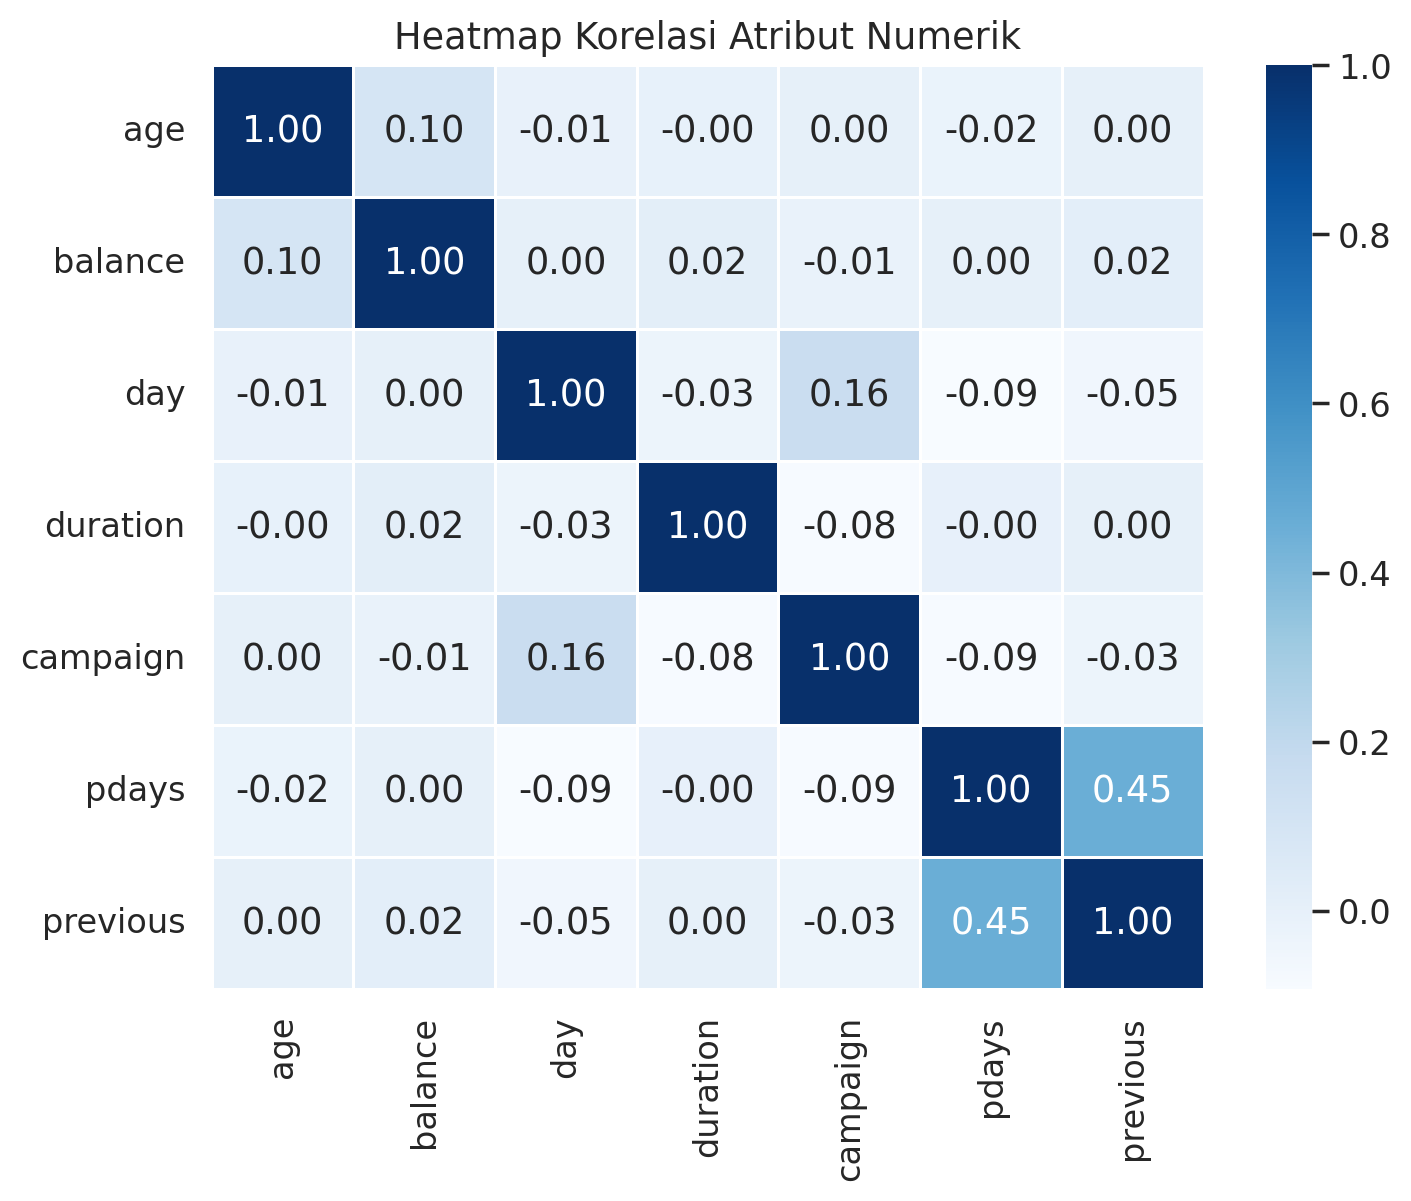

In [ ]:
# 3. VISUALISASI ATRIBUT NUMERIK
numeric_cols = ["age","balance","day","duration","campaign","pdays","previous"]

# (a) Histogram setiap atribut numerik
df[numeric_cols].hist(bins=30, figsize=(14,10), layout=(3,3))
plt.tight_layout()
plt.suptitle("Distribusi Atribut Numerik", y=1.02, fontsize=16)
plt.show()

# (b) Korelasi antar-atribut numerik
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

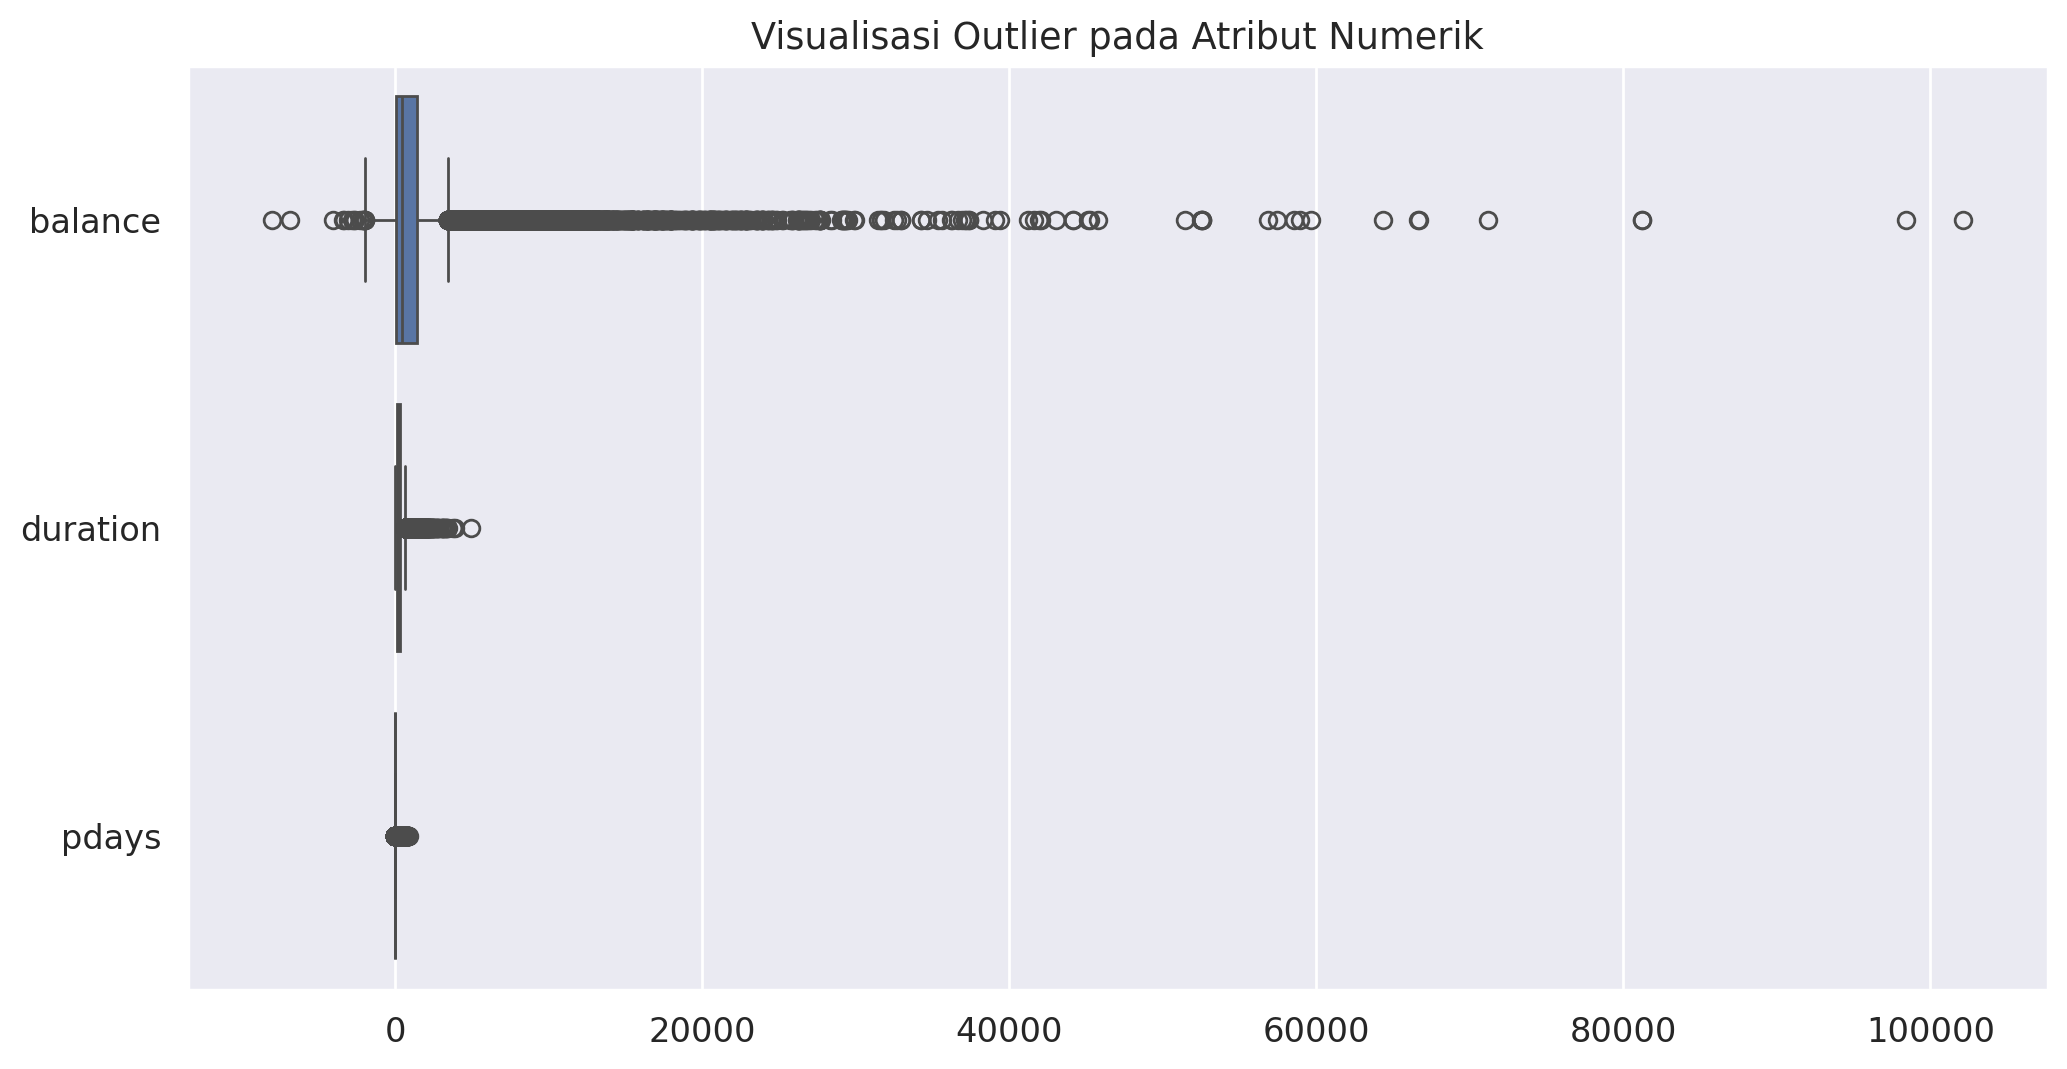

In [ ]:
# 3. VISUALISASI Outliinerr
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['balance', 'duration', 'pdays']], orient='h')
plt.title("Visualisasi Outlier pada Atribut Numerik")
plt.show()


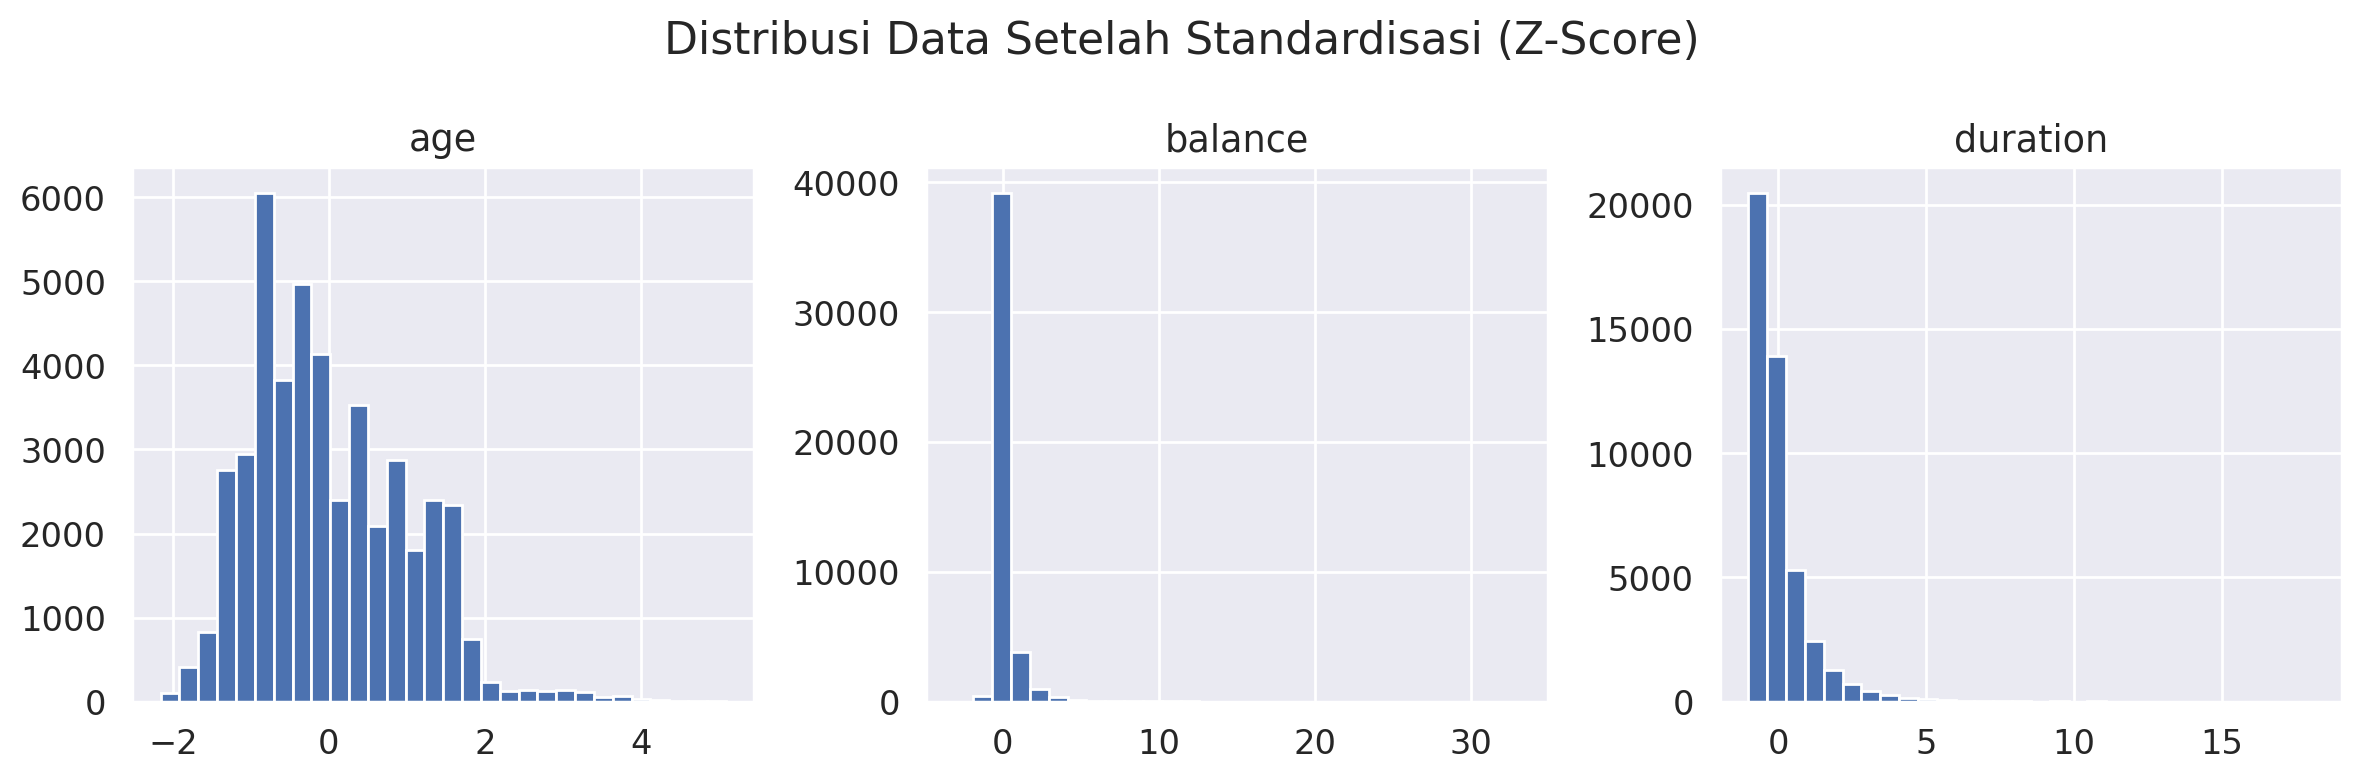

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['age', 'balance', 'duration']])
scaled_df = pd.DataFrame(scaled_data, columns=['age', 'balance', 'duration'])

scaled_df.hist(bins=30, figsize=(12,4), layout=(1,3))
plt.suptitle("Distribusi Data Setelah Standardisasi (Z-Score)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding untuk target
df['y'] = LabelEncoder().fit_transform(df['y'])

# One-hot encoding untuk variabel kategorikal
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,True,False,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,True,False,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,False,True,...,False,False,True,False,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing : {X_test.shape[0]}")


Jumlah data training: 36168
Jumlah data testing : 9043


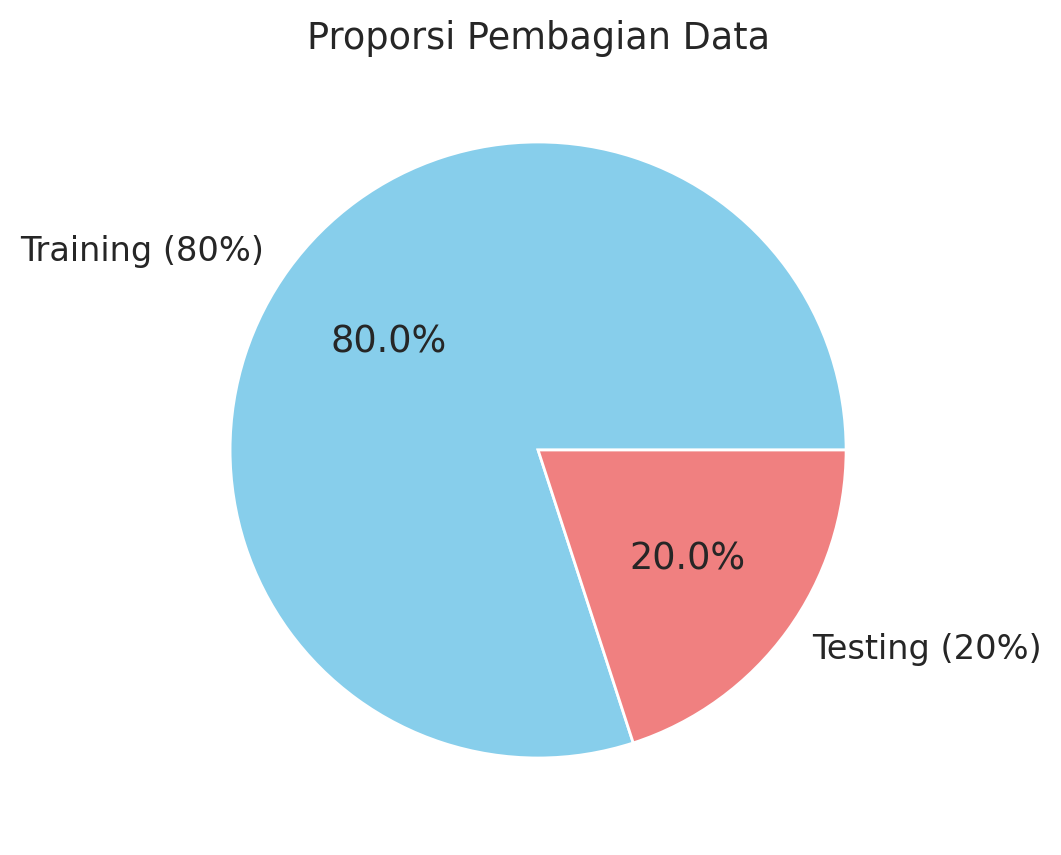

In [ ]:
sizes = [len(X_train), len(X_test)]
labels = ['Training (80%)', 'Testing (20%)']
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Proporsi Pembagian Data")
plt.show()


In [ ]:
# Training Model Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi menggunakan data testing
y_pred = rf_model.predict(X_test)


In [ ]:
# Evaluasi Model

# Menampilkan metrik evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAkurasi Model: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Confusion Matrix:
[[7758  227]
 [ 638  420]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.40      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043


Akurasi Model: 90.43%


<Figure size 600x500 with 0 Axes>

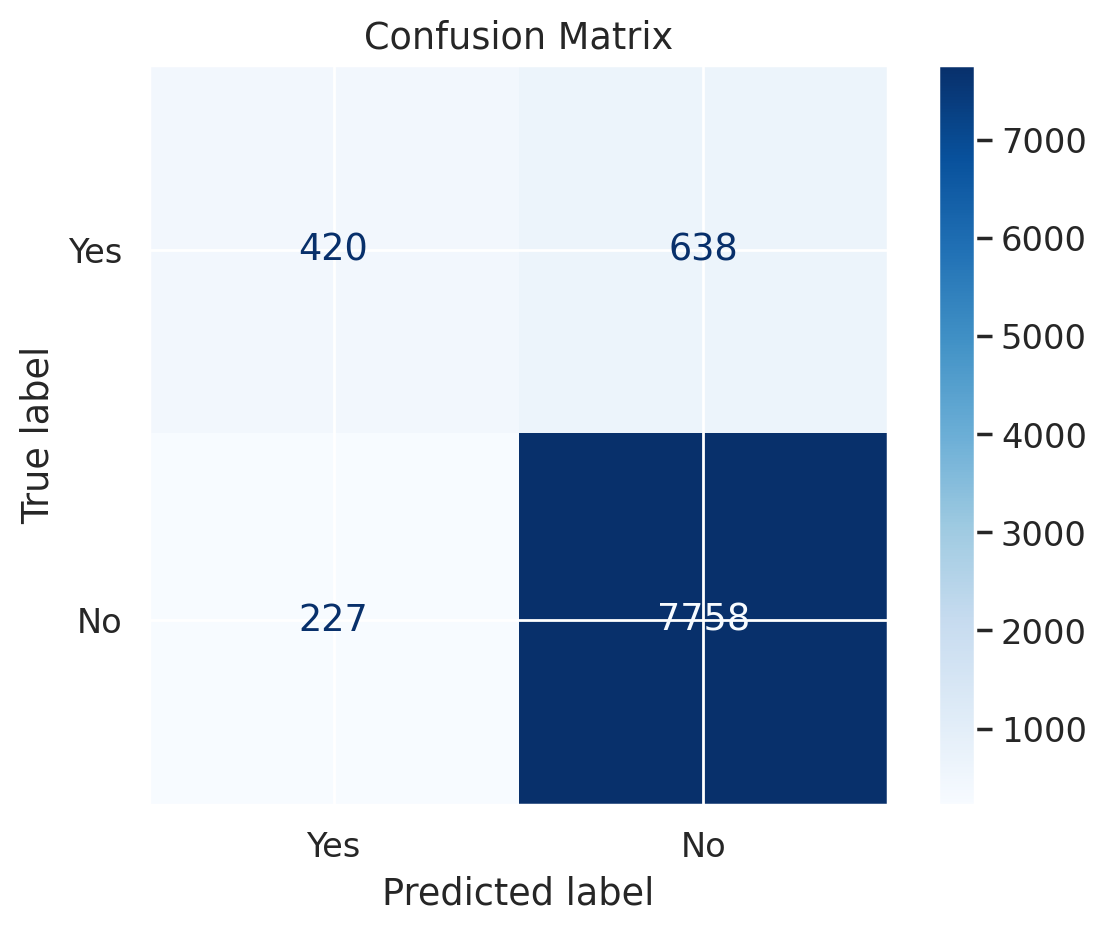

In [ ]:
#  Confusion Matrix (Visualisasi)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Yes", "No"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


/tmp/ipython-input-28-441363233.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette="pastel")


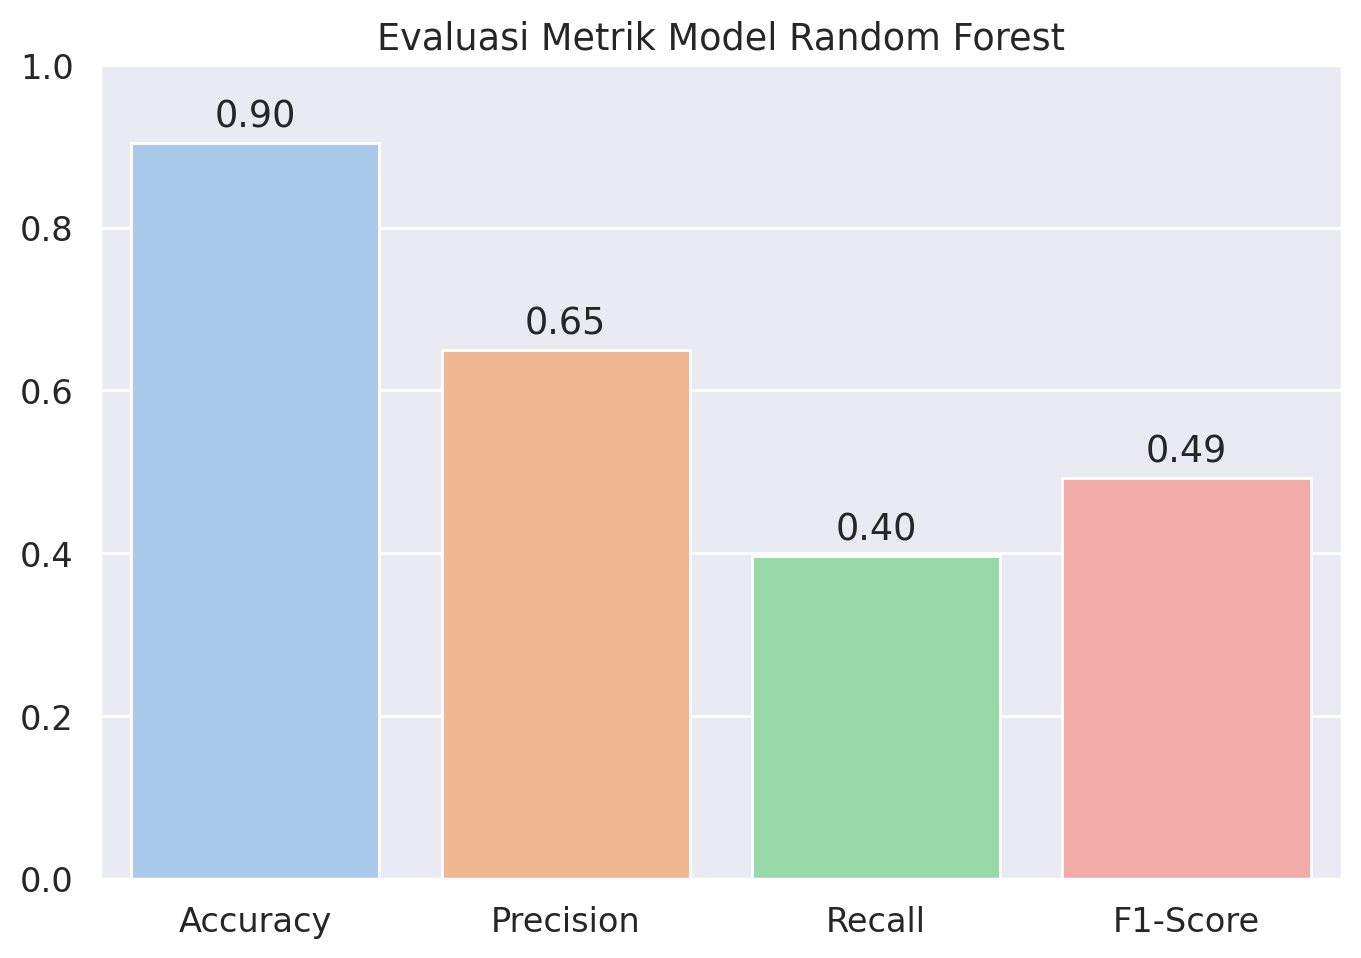

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi terhadap data uji menggunakan model Random Forest
y_pred = rf_model.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Siapkan data
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Visualisasi barchart
plt.figure(figsize=(7, 5))
sns.barplot(x=labels, y=metrics, palette="pastel")
plt.ylim(0, 1)
plt.title("Evaluasi Metrik Model Random Forest")
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


Distribusi Kelas Target:

           Jumlah Data  Persentase (%)
y_encoded                             
0                39922        88.30152
1                 5289        11.69848


/tmp/ipython-input-29-3752539475.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


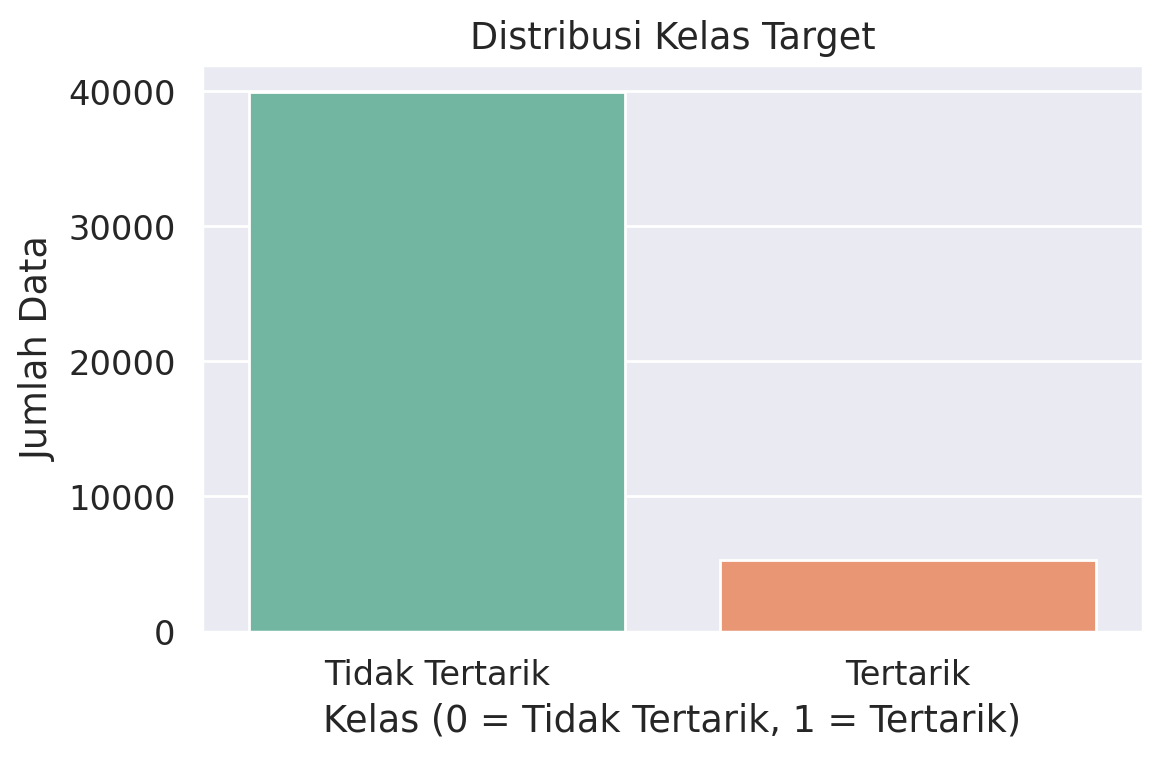

In [29]:
# Hitung jumlah dan persentase masing-masing kelas
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100

# Tampilkan distribusi kelas dalam bentuk tabel
distribusi_kelas = pd.DataFrame({
    'Jumlah Data': class_counts,
    'Persentase (%)': class_percentages
})
print("Distribusi Kelas Target:\n")
print(distribusi_kelas)

# Visualisasi distribusi kelas
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribusi Kelas Target")
plt.xlabel("Kelas (0 = Tidak Tertarik, 1 = Tertarik)")
plt.ylabel("Jumlah Data")
plt.xticks([0, 1], ['Tidak Tertarik', 'Tertarik'])
plt.tight_layout()
plt.show()